In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
import matplotlib

In [21]:
from collections import Counter

def normalize(scores):
  scores = Counter(scores)
  total = sum(scores.values(), 0.0)
  for key in scores:
    scores[key] /= total
  return scores

In [22]:
df = pd.read_json("./data/info/train_pairs.json", orient="records")
genuine_scores = np.array(df[df["type"] == "genuine"]["match_score"])
impostor_scores = np.array(df[df["type"] == "impostor"]["match_score"])
impostor_scores = normalize(impostor_scores)


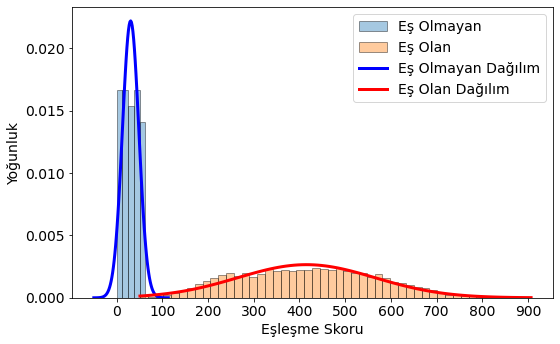

In [23]:
g_mu, g_std = norm.fit(genuine_scores) 
g_nrm = norm(g_mu, g_std)
g_x = np.linspace(genuine_scores.min(), genuine_scores.max(), 100) 
g_p = g_nrm.pdf(g_x)
plt.figure(figsize=(8,5), facecolor='white')
plt.xticks(np.arange(0,1000, 100))
matplotlib.rcParams.update({'font.size': 14})

density_val = np.array(list(impostor_scores.keys()))
i_mu, i_std = norm.fit(density_val ) 
i_nrm = norm(i_mu, i_std)
i_x = np.linspace(density_val.min() -50 , density_val.max() + 50, 100)
i_p = i_nrm.pdf(i_x)

plt.hist(impostor_scores, density=True, bins=5, edgecolor="black", alpha =.4, label="Eş Olmayan")
plt.hist(genuine_scores, density=True, bins=50, edgecolor="black", alpha=.4 , label="Eş Olan")
plt.plot(i_x, i_p, linewidth=3, color="b", label="Eş Olmayan Dağılım")
plt.plot(g_x, g_p, linewidth=3, color="r", label="Eş Olan Dağılım")
plt.rc('axes', labelsize=25)
plt.ylabel("Yoğunluk", fontsize=14)
plt.xlabel("Eşleşme Skoru", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()